In [114]:
from numpy import NaN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import true

# import Data miners 2022 (answers).csv from the same directory as this file and create a dataframe called df
df = pd.read_csv('Data miners 2022 (answers).csv')

In [115]:
#create a function that takes a string, lowercases it and turns it into a list of words
def string_to_list(string):
    string = string.lower()
    string = string.split()
    return string

#create a function that takes a string and a list of words and returns true if the string is one of the words in the list
def string_in_list(string, list_of_words):
    string = string_to_list(string)
    for word in string:
        if word in list_of_words:
            return True
    return False

#create a function that takes a list of words and a string and returns the index of that string in the list of words
def string_in_list_index(string, list_of_words):
    string = string_to_list(string)
    for word in string:
        if word in list_of_words:
            return list_of_words.index(word)
    return NaN

def check_if_left_is_num(string, list_of_words):
    string_index = string_in_list_index(string, list_of_words)
    index_val = list_of_words[string_index - 1]
    try:
        return int(index_val)
    except: 
        return NaN

listX = string_to_list('I have tried to write simple scripts in Python for 3 year')

def convert_experience_to_number(string):
    list_of_words = string_to_list(string)
    if (string_in_list("year", list_of_words)):
        return check_if_left_is_num("year", list_of_words)
    elif(string_in_list("years", list_of_words)):
        return check_if_left_is_num("years", list_of_words)
    else:
        return NaN

# add a new column to the df called programming_experience and fill it with the values that result from applying the function convert_experience_to_number to the column How long time have you been programming
df['programming_experience'] = df['How long time have you been programming?'].apply(convert_experience_to_number)


In [116]:
# I create a new column in the data frame called "python_skills". I then convert the ordinal data from 'How are your Python skills?' and populate the new column with it. 
df['python_skills'] = df['How are your Python skills?'].map({"Non-existing - I don't like snakes": 0, "I have heard about it and have an idea about what it can be used for": 1, "I can understand/read simple Python scripts, but have never written one": 2, "I have tried to write simple scripts in Python" : 3, "I am quite capable of programming in Python": 4, "I am a Python wizard": 5})

#I then remove all the columns but programming_experience and python_skills"
df = df[['programming_experience', 'python_skills']]


,programming_experience,python_skills
0,NaN,3.0
1,NaN,1.0
2,1.0,3.0
3,5.0,4.0
4,NaN,3.0
5,6.0,4.0
6,NaN,4.0
7,8.0,5.0
8,NaN,3.0
9,2.0,4.0


In [117]:

#Calculate the mean, std and var of the python experience and programming experience
ps_mean = df['Python skills'].mean()
ps_median = df['Python skills'].median()
ps_std = df['Python skills'].std()
ps_var = df['Python skills'].var()

pe_mean = df['Programming experience'].mean()
pe_median = df['Programming experience'].median()
pe_std = df['Programming experience'].std()
pe_var = df['Programming experience'].var()

print(ps_median)
print(ps_mean)

print(pe_median)
print(pe_mean)

#remove observations that are more than 3 standard deviations away from the mean
# df = df[(df['Python skills'] < ps_mean + 3 * ps_std) & (df['Python skills'] > ps_mean - 3 * ps_std)]
# df = df[(df['Programming experience'] < pe_mean + 3 * pe_std) & (df['Programming experience'] > pe_mean - 3 * pe_std)]

#if How long time have you been programming? (Numerical) is not a number, then replace it with the mean of the column python experience
df['Programming experience'] = df['Programming experience'].fillna(df['Programming experience'].mean())

#if how are your python skills? (Numerical) is not a number, then replace it with the mean of the column how are your python skills? (Numerical)
df['Python skills'] = df['Python skills'].fillna(df['Python skills'].mean())

#Create a df that shows only python skills and programming experience
df = df[['Python skills', 'Programming experience']]

# df['Python skills'] = df['Python skills'] / max(df['Python skills']) # Normalize python skills
# df['Programming experience'] = df['Programming experience'] / max(df['Programming experience']) # Normalize Programming experience



KeyError: 'Python skills'

Text(0, 0.5, 'Number of observations')

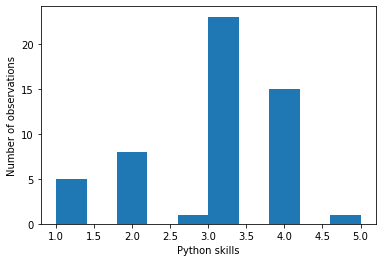

In [ ]:
#plot python skills to check for outliers
plt.hist(df['Python skills'])
# on the x-axis we have the python skills and on the y-axis we have the number of observations
plt.xlabel('Python skills')
plt.ylabel('Number of observations')




Text(0, 0.5, 'Number of observations')

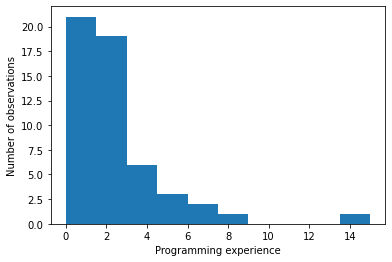

In [ ]:

#plot programing experience to check for outliers
#remove observations that are more than 3 standard deviations away from the mean
#df = df[(df['Programming experience'] < pe_mean + 3 * pe_std) & (df['Programming experience'] > pe_mean - 3 * pe_std)]
plt.hist(df['Programming experience'])
# on the x-axis we have the programming experience and on the y-axis we have the number of observations
plt.xlabel('Programming experience')
plt.ylabel('Number of observations')



0.36863169131618023


<AxesSubplot:xlabel='Programming experience', ylabel='Python skills'>

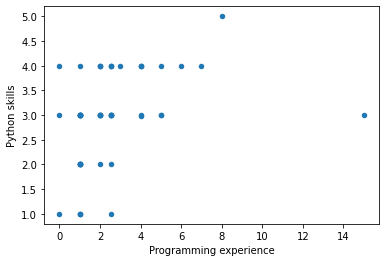

In [ ]:

#what is the correlation between programming experience and python skills? 
#calculate pearson correlation
pearson = df['Programming experience'].corr(df['Python skills'])
print(pearson)

# We see that when python skill increase with 1, programming experience increase with 0.52
# Which can be be considered 

#create a scatter plot that shows the relationship between python experience and programming experience
df.plot.scatter(x='Programming experience', y='Python skills')

# We set programming experience as the independent variable and python skills as the dependent variable

#Relationship

    


In [ ]:
reg = np.polyfit(df['Programming experience'], df['Python skills'], 1)
print(reg)

# When programming experience increase with 1, python skills is expected to increase with 0.52

[0.14336685 2.61401682]


0.1358893238426272


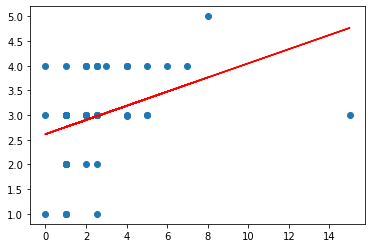

In [ ]:
trend = np.polyval(reg, df['Programming experience'])
plt.scatter(df['Programming experience'], df['Python skills']) 
plt.plot(df['Programming experience'], trend, color='red')


#calculate the sum of squared regression
ssr = sum((df['Python skills'] - trend)**2)

#calculate the sum of squared total
sst = sum((df['Python skills'] - df['Python skills'].mean())**2)

#calculate the r-squared
r_squared = 1 - (ssr/sst)

print(r_squared)

# this means that 0.27% of the variation in python skills can be explained by programming experience





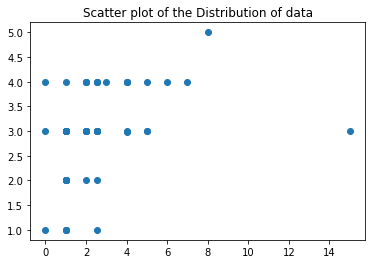

,Python skills,Programming experience,class
0,3.000000,0.00000,1
1,1.000000,2.55814,1
2,3.000000,1.00000,1
3,4.000000,5.00000,1
4,3.000000,2.55814,1
5,4.000000,6.00000,1
6,4.000000,2.55814,1
7,5.000000,8.00000,1
8,3.000000,2.55814,1
9,4.000000,2.00000,1


In [ ]:

#Clustering

import random
from tkinter import E
df = df.reset_index(drop=True) # Remove the index from the file

df['class'] = 1 # Assign all points to class 1
#We have already normalized the data.

plt.title('Scatter plot of the Distribution of data')
plt.scatter(df['Programming experience'],df['Python skills']) # Visualizing the distribution
plt.show()            

display(df)



In [ ]:
def initializeMeans(df):

    # Randomly initialize the means
    mean1 = df.iloc[random.randint(0,len(df)-1)]
    mean2 = df.iloc[random.randint(0,len(df)-1)]

    """
    Intialize the means by randomly taking two points from the dataframe. Hint: check the function 'random.randint'
    return two pandas dataframes (or pandas series) with mean1 and mean2
    """

    return mean1, mean2


In [ ]:
def euclideanDist(df,pointIDX,mean1,mean2):

    # Calculate the euclidean distance between the point and the two means
    dist1 = ((df['Programming experience'][pointIDX] - mean1['Programming experience'])**2 + (df['Python skills'][pointIDX] - mean1['Python skills'])**2)**0.5
    dist2 = ((df['Programming experience'][pointIDX] - mean2['Programming experience'])**2 + (df['Python skills'][pointIDX] - mean2['Python skills'])**2)**0.5
    
    # Assign the point to the mean with the smallest distance
    if dist1 < dist2:
        df['class'][pointIDX] = 1
    else:
        df['class'][pointIDX] = 2
    
    return df


m1, m2 = initializeMeans(df)
b = euclideanDist(df, 5, m1,m2)

print (b)

    Python skills  Programming experience  class
0        3.000000                 0.00000      1
1        1.000000                 2.55814      1
2        3.000000                 1.00000      1
3        4.000000                 5.00000      1
4        3.000000                 2.55814      1
5        4.000000                 6.00000      2
6        4.000000                 2.55814      1
7        5.000000                 8.00000      1
8        3.000000                 2.55814      1
9        4.000000                 2.00000      1
10       1.000000                 1.00000      1
11       3.000000                 2.00000      1
12       4.000000                 0.00000      1
13       3.000000                 1.00000      1
14       1.000000                 1.00000      1
15       4.000000                 3.00000      1
16       4.000000                 2.55814      1
17       4.000000                 7.00000      1
18       3.000000                 5.00000      1
19       4.000000   

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_2775/2405293826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2


In [ ]:
def updateMean(df):
    """
    df is the dataframe of points containing the assigned classes
    return updated mean1 and mean2 based on the value in column 'class'. mean1 and mean2 should still be pandas dataframes (or pandas series)
    """
    mean1 = df[df['class'] == 1].mean()
    mean2 = df[df['class'] == 2].mean()
    
    return mean1, mean2
                                                                                        

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_2775/2405293826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_2775/2405293826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1


Iteration 0/0
Iteration 1/1
Iteration 2/2
Iteration 3/3
Iteration 4/4


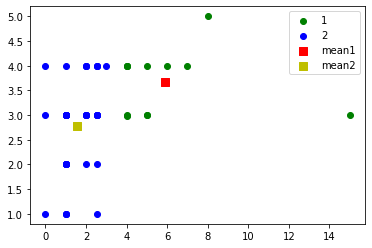

In [ ]:
def Kmeans(df,iterations):
    """
    When you have implemented the three functions this function should work and run the Kmeans algorithm!
    """

    mean1 , mean2 = initializeMeans(df)

    for iteration in range(iterations): # Change this when implementing how many times it should recalculate the mean

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2)
            
        mean1,mean2 = updateMean(df)

    return df, mean1, mean2

df, mean1, mean2 = Kmeans(df,5)

plt.clf()
plt.scatter(df.loc[df['class'] == 1]['Programming experience'],df.loc[df['class'] == 1]['Python skills'],color='g',label='1')  #
plt.scatter(df.loc[df['class'] == 2]['Programming experience'],df.loc[df['class'] == 2]['Python skills'],color='b',label='2')  #
                                                                                                            #
plt.scatter(mean1['Programming experience'],mean1['Python skills'],s=70,label='mean1',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(mean2['Programming experience'],mean2['Python skills'],s=70,label='mean2',marker='s',color='y')                    #
                                                                                                            #
plt.legend()                                                                                                #
plt.show()   
